# Compare Prompts

   precision  recall     f1
1      0.675   0.593  0.613
2      0.690   0.582  0.606
3      0.689   0.624  0.637
4      0.722   0.486  0.544
5      0.690   0.610  0.627
6      0.720   0.485  0.538
7      0.731   0.512  0.562
8      0.740   0.503  0.554


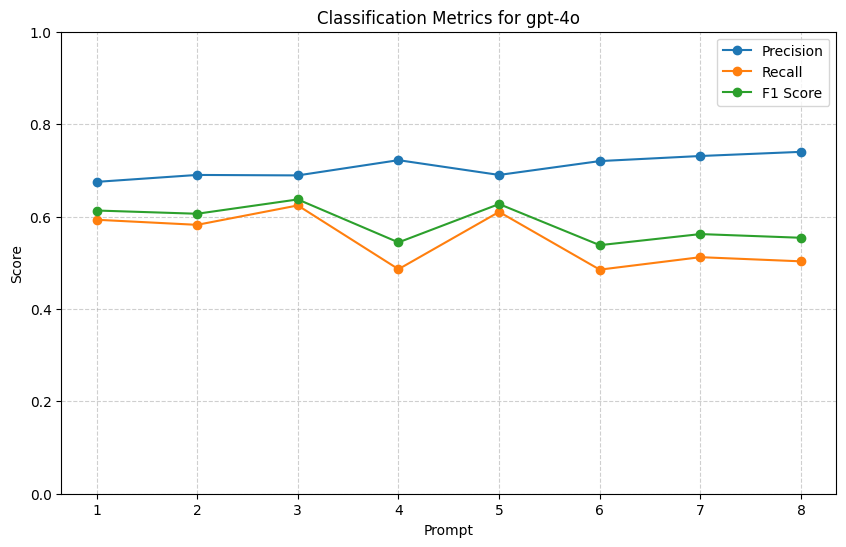

In [6]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Set folder path
folder_path = "/home/fantoni/patent-sentence-classification/results/prompting"

# Choose model
model_name = 'gpt-3.5-turbo'
model_name = 'gpt-4o'
#model_name = 'Llama-3.1-8B-Instruct'

# Set averaging mode
average = 'weighted'

results_all = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx") and file_name.startswith(model_name):
        prompt_number = file_name.split('_')[2].replace(".xlsx", "")[-1]
        result_df = pd.read_excel(os.path.join(folder_path, file_name))

        # Set labels
        true_labels = result_df['sent_tag']  
        predicted_labels = result_df['predicted_tag']

        # Calculate classification metrics
        precision = precision_score(true_labels, predicted_labels, average=average, zero_division=0)
        recall = recall_score(true_labels, predicted_labels, average=average, zero_division=0)
        f1 = f1_score(true_labels, predicted_labels, average=average, zero_division=0)

        # Append to results
        results_all[prompt_number] = {'precision': precision, 'recall': recall, 'f1': f1}

# Print DataFrame
results_df = pd.DataFrame.from_dict(results_all, orient='index').sort_index().round(3)
print(results_df)

# Ensure prompts are sorted correctly
sorted_prompts = sorted(results_all.keys())

# Sort results by prompt number
precision_values = results_df['precision'].tolist()
recall_values = results_df['recall'].tolist()
f1_values = results_df['f1'].tolist()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sorted_prompts, precision_values, marker = 'o', label='Precision')
plt.plot(sorted_prompts, recall_values, marker = 'o', label='Recall')
plt.plot(sorted_prompts, f1_values, marker = 'o', label='F1 Score')
plt.ylim(0, 1)
plt.xlabel('Prompt')
plt.ylabel('Score')
plt.title(f'Classification Metrics for {model_name}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compare Prompts and Models

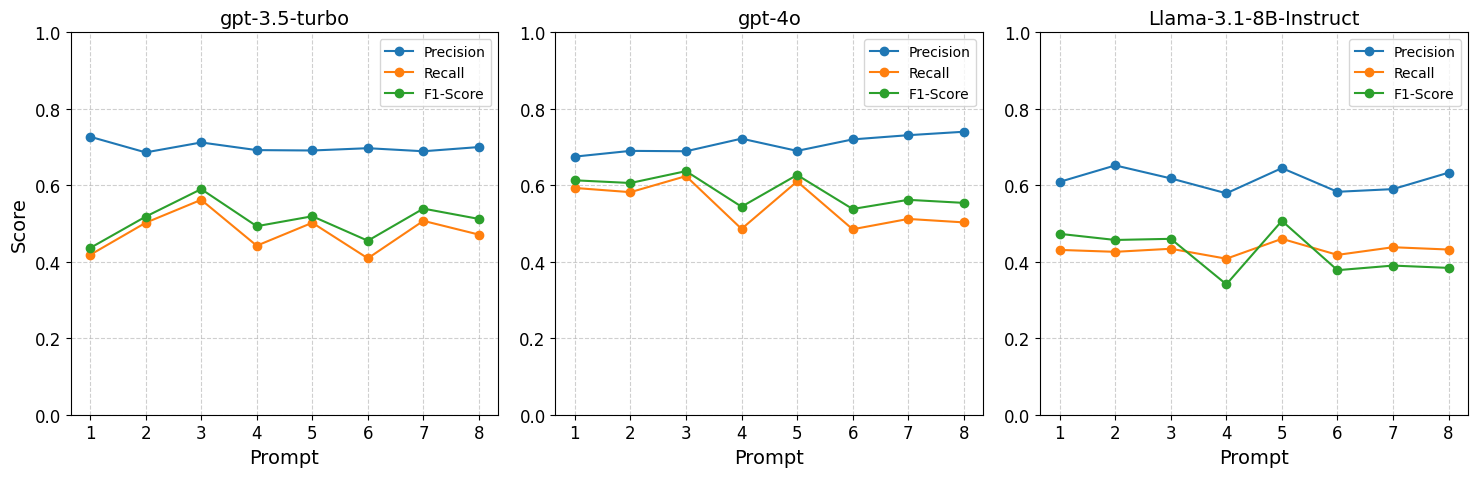

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Set folder path
folder_path = "/home/fantoni/patent-sentence-classification/results/prompting"

# Set averaging mode
average = 'weighted'

# Initialize dictionary to store results
all_models_results = {}

# Iterate through files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        
        # Infer model name from file name
        model_name = file_name.split('_')[0]  # Assumes model name is the first part of the file name
        
        # Read the Excel file
        result_df = pd.read_excel(os.path.join(folder_path, file_name))
        
        # Extract prompt number
        prompt_number = file_name.split('_')[2].replace(".xlsx", "")[-1]
        
        # Set labels
        true_labels = result_df['sent_tag']  
        predicted_labels = result_df['predicted_tag']
        
        # Calculate classification metrics
        precision = precision_score(true_labels, predicted_labels, average=average, zero_division=0)
        recall = recall_score(true_labels, predicted_labels, average=average, zero_division=0)
        f1 = f1_score(true_labels, predicted_labels, average=average, zero_division=0)
        
        # Store results
        if model_name not in all_models_results:
            all_models_results[model_name] = {}
        all_models_results[model_name][prompt_number] = {'precision': precision, 'recall': recall, 'f1': f1}

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 10})

# Create subplots for each model in a row
fig, axes = plt.subplots(1, len(all_models_results), figsize=(5 * len(all_models_results), 5))
axes = [axes] if len(all_models_results) == 1 else axes

for i, (ax, (model, results)) in enumerate(zip(axes, all_models_results.items())):
    df = pd.DataFrame(results).T.sort_index().round(3)
    df.plot(kind='line', marker='o', ax=ax)
   
    ax.set_title(model)
    
    ax.set_xlabel('Prompt')
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.index)

    ax.set_ylim(0, 1)
    ax.set_ylabel('Score' if i == 0 else '')
    
    ax.legend(['Precision', 'Recall', 'F1-Score'])
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()